<a href="https://colab.research.google.com/github/Kimz-CS/WhatsApp-Group-Analysis/blob/main/WhatsApp_Analysis_Bholatto_Bholatto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WhatsApp** **Group** **Analysis**

In [58]:
!pip install emoji

In [59]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [60]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (352/352), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 6441 (delta 183), reused 269 (delta 140), pack-reused 6089
Receiving objects: 100% (6441/6441), 117.89 MiB | 31.32 MiB/s, done.
Resolving deltas: 100% (3791/3791), done.
/content/word_cloud/word_cloud
Processing /content/word_cloud/word_cloud
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp36-cp36m-linux_x86_64.whl size=332733 sha256=d2561bd8871c266b69d2b7a46b3defab52aadf533e6254dcd759ff219ff3e5f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-rz7gzmy5/wheels/25/0d/29/49e0d7b13f38317e6d03d9911d1fe7c3b1e8ba9799fc28befd
Successfully built wordcloud
  Found existing installation: wordcloud 1.8.1
    Uninstalling wordcloud-1.8.1:
      Successfully uninstalled wordcloud-1.8.1


In [61]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def startsWithDateAndTimeios(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])?[ ]?(AM|PM|am|pm)?\]' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [62]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [63]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

def getDataPointios(line):
	splitLine = line.split('] ')
	dateTime = splitLine[0]
	if ',' in dateTime:
		date, time = dateTime.split(',')
	else:
		date, time = dateTime.split(' ')
	message = ' '.join(splitLine[1:])
	if FindAuthor(message):
		splitMessage = message.split(':')
		author = splitMessage[0]
		message = ' '.join(splitMessage[1:])
	else:
		author = None
	if time[5]==":":
		time = time[:5]+time[-3:]
	else:
		if 'AM' in time or 'PM' in time:
			time = time[:6]+time[-3:]
		else:
			time = time[:6]
	return date, time, author, message

In [64]:
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d-%m-%Y").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%d-%m-%y").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d/%m/%Y").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")

In [65]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [66]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Chat with Bholatto-Bholatto.txt to WhatsApp Chat with Bholatto-Bholatto.txt


In [67]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = "WhatsApp Chat with Bholatto-Bholatto.txt" 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

2019/12/26, 23:53 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.



In [68]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [69]:
df.tail(2)

,Date,Time,Author,Message,emoji,urlcount
6062,2020-11-18,22:58,Malu,Stressed that's all. Got sites to go to,[],0
6063,2020-11-18,23:01,Sthwa,"Sorry bro ,",[],0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 6063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5978 non-null   datetime64[ns]
 1   Time      5978 non-null   object        
 2   Author    5978 non-null   object        
 3   Message   5978 non-null   object        
 4   emoji     5978 non-null   object        
 5   urlcount  5978 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 326.9+ KB


## Printing Participants

In [71]:
df.Author.unique()

array(['Taps', 'Malu', 'Mbuyi', 'Christian', 'Sthwa', 'Vikela', 'Mo',
       'SaBulelani'], dtype=object)

In [72]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5978 entries, 0 to 6063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5978 non-null   datetime64[ns]
 1   Time      5978 non-null   object        
 2   Author    5978 non-null   object        
 3   Message   5978 non-null   object        
 4   emoji     5978 non-null   object        
 5   urlcount  5978 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 326.9+ KB


In [73]:
df.Author.unique()

array(['Taps', 'Malu', 'Mbuyi', 'Christian', 'Sthwa', 'Vikela', 'Mo',
       'SaBulelani'], dtype=object)

## Group Wise Stats

In [74]:
total_messages = df.shape[0]
print(total_messages)

5978


## Total Media Messages

In [75]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [76]:
emojis = sum(df['emoji'].str.len())
print(emojis)

3327


In [77]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [78]:
links = np.sum(df.urlcount)

In [79]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 5978
Media: 0
Emojis: 3327
Links: 6


## Separating the Media and Text Messages

In [80]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")|(df["Message"] == " You deleted this message.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [81]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 6063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4340 non-null   datetime64[ns]
 1   Time      4340 non-null   object        
 2   Author    4340 non-null   object        
 3   Message   4340 non-null   object        
 4   emoji     4340 non-null   object        
 5   urlcount  4340 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 237.3+ KB


In [82]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [83]:
messages_df.tail(5)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
6059,2020-11-18,22:57,Malu,Not looking good at all will hear from KIA to...,[],0,52,11,1
6060,2020-11-18,22:58,Sthwa,Shucks,[],0,7,2,1
6061,2020-11-18,22:58,Sthwa,Are u ok ?,[],0,11,5,1
6062,2020-11-18,22:58,Malu,Stressed that's all. Got sites to go to,[],0,40,9,1
6063,2020-11-18,23:01,Sthwa,"Sorry bro ,",[],0,12,4,1


In [84]:
messages_df["emojicount"]= df['emoji'].str.len()

## Author Wise Stats

In [85]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == l[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Taps -
Messages Sent 1293
Words per message 8.836040216550657
Media Messages Sent 484
Emojis Sent 902
Links Sent 2

Stats of Malu -
Messages Sent 1338
Words per message 7.537369207772795
Media Messages Sent 681
Emojis Sent 1089
Links Sent 3

Stats of Mbuyi -
Messages Sent 611
Words per message 10.967266775777414
Media Messages Sent 70
Emojis Sent 717
Links Sent 1

Stats of Sthwa -
Messages Sent 469
Words per message 6.825159914712153
Media Messages Sent 134
Emojis Sent 69
Links Sent 0

Stats of Vikela -
Messages Sent 467
Words per message 9.139186295503212
Media Messages Sent 229
Emojis Sent 431
Links Sent 0

Stats of Christian -
Messages Sent 61
Words per message 4.426229508196721
Media Messages Sent 17
Emojis Sent 71
Links Sent 0

Stats of Mo -
Messages Sent 34
Words per message 9.382352941176471
Media Messages Sent 0
Emojis Sent 37
Links Sent 0

Stats of SaBulelani -
Messages Sent 67
Words per message 6.895522388059701
Media Messages Sent 14
Emojis Sent 11
Links Sent 0



## Most Emojis Used in the Group

### Emoji Stats

#### Unique Emojis used in the group

In [86]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

121


### Most Emoji Used

In [87]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('🤣', 1899), ('😂', 414), ('👏🏾', 88), ('🙆🏻\u200d♂', 63), ('🤦🏽\u200d♂️', 54), ('🙈', 43), ('⚽', 36), ('🤦🏽\u200d♂', 35), ('😭', 34), ('🙏🏼', 28), ('⚰️', 24), ('🙆🏽\u200d♂', 23), ('🔥', 23), ('👀', 21), ('🤗', 20), ('🤷🏾\u200d♂️', 20), ('🤷🏽\u200d♂️', 20), ('👌🏾', 19), ('🤦🏾\u200d♂️', 18), ('🤷🏾\u200d♂', 17), ('🙆🏽\u200d♂️', 16), ('🙏🏾', 16), ('💀', 15), ('🤦🏿\u200d♂', 14), ('🤔', 13), ('🙏🏽', 13), ('😒', 13), ('😊', 12), ('🤝🏾', 11), ('😉', 11), ('\U0001f97a', 11), ('👌🏽', 10), ('😔', 10), ('😜', 9), ('🙌🏾', 9), ('👆🏻', 8), ('😃', 8), ('⬆️', 7), ('🤙🏼', 7), ('😌', 6), ('😫', 6), ('🙆🏾\u200d♂️', 6), ('😅', 6), ('😍', 6), ('😆', 6), ('🙅🏽\u200d♂️', 6), ('😘', 6), ('👊🏼', 5), ('👍🏽', 5), ('🤞🏾', 5), ('💯', 5), ('😹', 5), ('😄', 5), ('😳', 5), ('🥃', 4), ('😀', 4), ('👏🏽', 4), ('😑', 4), ('🇿🇼', 4), ('\U0001f928', 4), ('🏃🏽', 4), ('💁🏽\u200d♂️', 4), ('🚩', 3), ('✋🏾', 3), ('😩', 3), ('👊🏽', 3), ('👴🏽', 3), ('\U0001f92a', 3), ('🙁', 3), ('\U0001f92e', 3), ('😏', 3), ('🏊🏽\u200d♀️', 3), ('😋', 3), ('😁', 2), ('🙄', 2), ('💔', 2), ('✊🏾', 2), ('😗', 2), ('😶'

In [88]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,🤣,1899
1,😂,414
2,👏🏾,88
3,🙆🏻‍♂,63
4,🤦🏽‍♂️,54
...,...,...
116,🎉,1
117,🤬,1
118,😝,1
119,😴,1


### Emoji Distribution

In [89]:
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [90]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
fig.write_image("image.png")

In [103]:
from google.colab import files

files.download('image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Person Wise Emoji Distribution

In [91]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Taps


Emoji Distribution for Malu


Emoji Distribution for Mbuyi


Emoji Distribution for Sthwa


Emoji Distribution for Vikela


Emoji Distribution for Christian


Emoji Distribution for Mo


Emoji Distribution for SaBulelani


## More Stats

### Day Wise Distribution

In [92]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [104]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()
fig.write_image("image.png")

In [105]:
from google.colab import files

files.download('image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Number of messages as time moves on

In [106]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()
fig.write_image("messages.png")

In [107]:
from google.colab import files

files.download('messages.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()
fig.write_image("message_count.png")

In [111]:
from google.colab import files

files.download('message_count.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Chatter

In [112]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()
fig.write_image("chatter.png")

In [113]:
from google.colab import files

files.download('chatter.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## When group members are most active

Text(0, 0.5, 'Time')

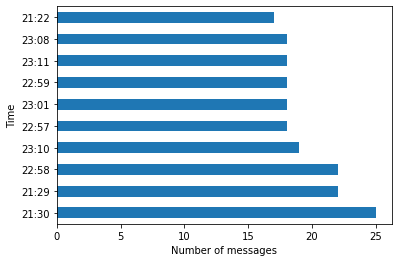

In [97]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

## The most happening day was 

2020-06-25    124
2020-07-02    110
2020-10-09    108
2020-07-22     80
2020-05-11     78
             ... 
2020-05-12      1
2020-07-08      1
2020-04-15      1
2020-06-02      1
2020-04-23      1
Name: Date, Length: 196, dtype: int64


Text(0, 0.5, 'Date')

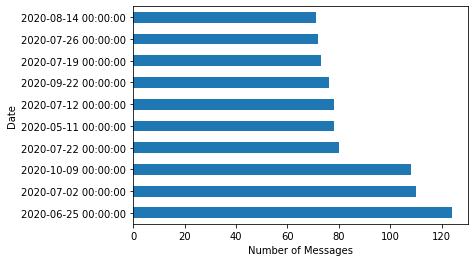

In [98]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### Message having the maximum number of words

In [99]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2020-10-07 00:00:00
Time                                                        17:36
Author                                                      Mbuyi
Message          I don't know if i should be disgusted or disa...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                 2037
Word_Count                                                    366
MessageCount                                                    1
emojicount                                                      0
Name: 4816, dtype: object

### Word Cloud

In [100]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 175836 words in all the messages.


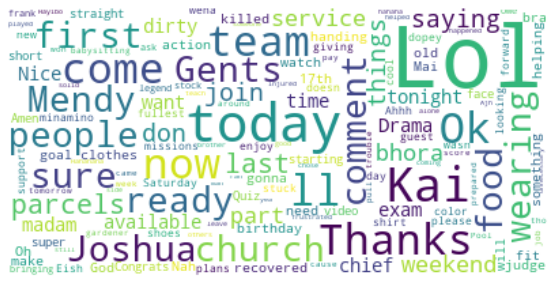

<Figure size 432x288 with 0 Axes>

In [120]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("cloud.jpg")

### Author wise word cloud


Author name Taps


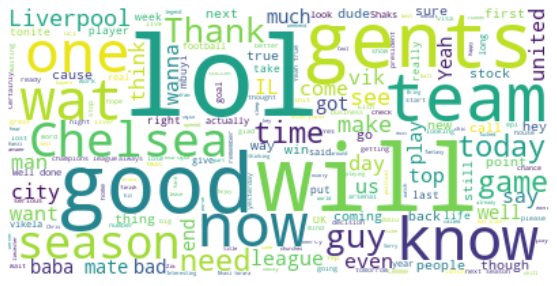

Author name Malu


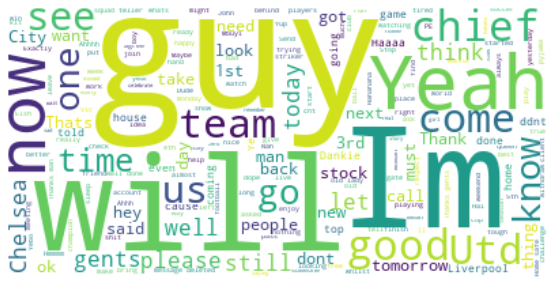

Author name Mbuyi


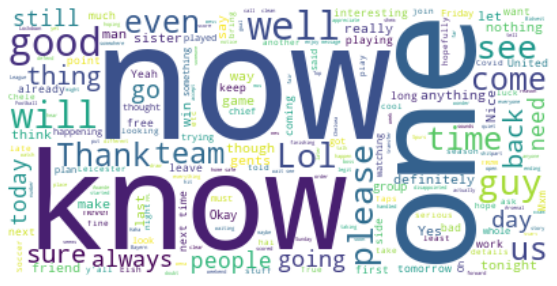

Author name Sthwa


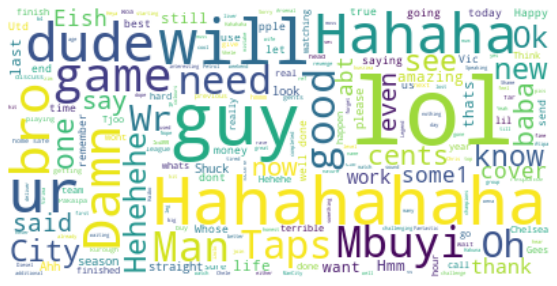

Author name Vikela


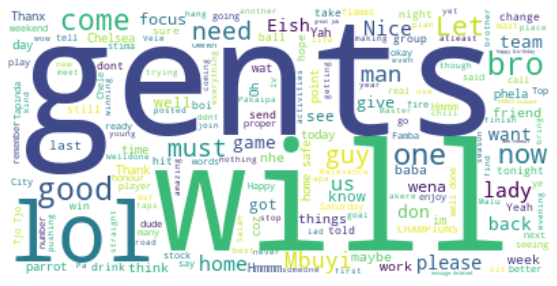

Author name Christian


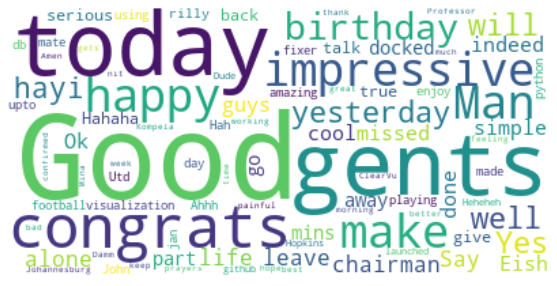

Author name Mo


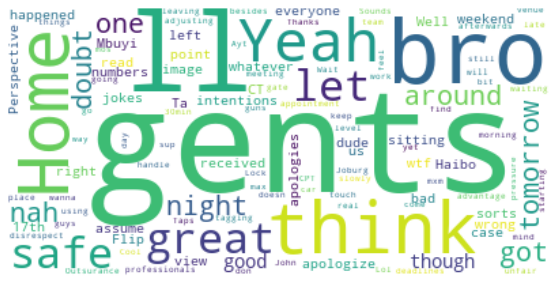

Author name SaBulelani


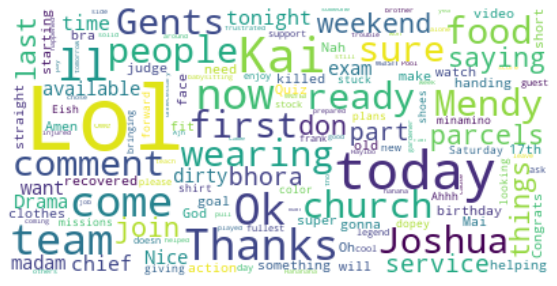

In [102]:
 l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()